# Project 3

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

## Get Data

In [11]:
stocks = pd.read_csv('prices.csv')

In [12]:
print(stocks.head)
print(len(stocks))

<bound method NDFrame.head of                        date symbol        open       close         low  \
0       2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998   
1       2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002   
2       2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000   
3       2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000   
4       2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996   
...                     ...    ...         ...         ...         ...   
851259           2016-12-30    ZBH  103.309998  103.199997  102.849998   
851260           2016-12-30   ZION   43.070000   43.040001   42.689999   
851261           2016-12-30    ZTS   53.639999   53.529999   53.270000   
851262  2016-12-30 00:00:00    AIV   44.730000   45.450001   44.410000   
851263  2016-12-30 00:00:00    FTV   54.200001   53.630001   53.389999   

              high     volume  
0       126.250000  2163600.0  
1       125.54000

In [14]:
stocks.columns
stocks.describe
appleStock = stocks.loc[stocks.symbol == 'AAPL']
print(appleStock.head)
print(len(appleStock))

<bound method NDFrame.head of               date symbol        open       close         low        high  \
254     2010-01-04   AAPL  213.429998  214.009998  212.380001  214.499996   
721     2010-01-05   AAPL  214.599998  214.379993  213.249994  215.589994   
1189    2010-01-06   AAPL  214.379993  210.969995  210.750004  215.230000   
1657    2010-01-07   AAPL  211.750000  210.580000  209.050005  212.000006   
2125    2010-01-08   AAPL  210.299994  211.980005  209.060005  212.000006   
...            ...    ...         ...         ...         ...         ...   
848767  2016-12-23   AAPL  115.589996  116.519997  115.589996  116.519997   
849267  2016-12-27   AAPL  116.519997  117.260002  116.489998  117.800003   
849767  2016-12-28   AAPL  117.519997  116.760002  116.199997  118.019997   
850267  2016-12-29   AAPL  116.449997  116.730003  116.400002  117.110001   
850767  2016-12-30   AAPL  116.650002  115.820000  115.430000  117.199997   

             volume  
254     123432400.0  
7

## Make Train and Test Sets

In [15]:
# Split the data into training/testing sets
appleOpen = appleStock['open']
appleOpen = appleOpen.to_frame()
print(type(appleOpen))
print(len(appleOpen))
appleOpen.describe
apple_X_train = appleOpen[:-20]
apple_X_test = appleOpen[-20:]

# Split the targets into training/testing sets
appleClose = appleStock['close']
appleClose = appleClose.to_frame()
print(type(appleClose))
print(len(appleClose))
appleClose.describe
apple_y_train = appleClose[:-20]
print(len(apple_y_train))
apple_y_test = appleClose[-20:]
print(len(apple_y_test))

<class 'pandas.core.frame.DataFrame'>
1762
<class 'pandas.core.frame.DataFrame'>
1762
1742
20


In [16]:
print(appleOpen.describe)

<bound method NDFrame.describe of               open
254     213.429998
721     214.599998
1189    214.379993
1657    211.750000
2125    210.299994
...            ...
848767  115.589996
849267  116.519997
849767  117.519997
850267  116.449997
850767  116.650002

[1762 rows x 1 columns]>


In [24]:
print(apple_y_test.describe)

<bound method NDFrame.describe of              close
841267  109.900002
841767  109.110001
842267  109.949997
842767  111.029999
843267  112.120003
843767  113.949997
844267  113.300003
844767  115.190002
845267  115.190002
845767  115.820000
846267  115.970001
846767  116.639999
847267  116.949997
847767  117.059998
848267  116.290001
848767  116.519997
849267  117.260002
849767  116.760002
850267  116.730003
850767  115.820000>


In [30]:
dfApple_y_pred = pd.DataFrame(apple_y_pred)
print(dfApple_y_pred.describe)

<bound method NDFrame.describe of              0
0   109.251699
1   110.080746
2   109.581321
3   109.341599
4   110.939757
5   112.388086
6   113.366961
7   113.916323
8   115.114947
9   115.454552
10  116.543302
11  115.874075
12  116.812988
13  116.872924
14  116.423437
15  115.664309
16  116.593240
17  117.592090
18  116.523321
19  116.723096>


In [17]:
print(len(apple_X_train), ' ', len(apple_y_train))

1742   1742


## Break Data Up

In [70]:
#Open
appleOpenFirst20 = appleStock[:20]
appleOpenFirst20 = appleOpenFirst20['open']

appleOpenLast20 = appleStock[20:]
appleOpenLast20 = appleOpenLast20['open']

#Close
appleCloseFirst20 = appleStock[:20]
appleCloseFirst20 = appleCloseFirst20['open']

appleCloseLast20 = appleStock[20:]
appleCloseLast20 = appleCloseLast20['close']


## Scatter Models

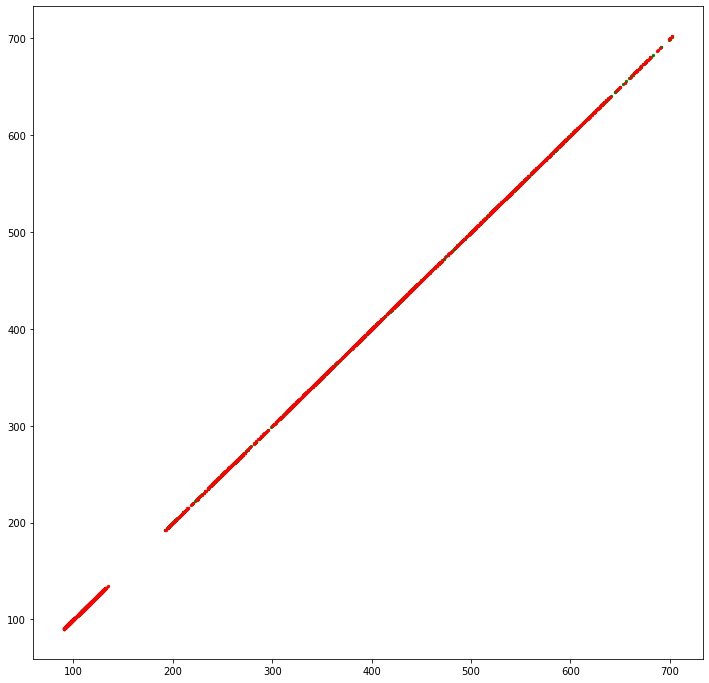

In [88]:
#Scatter Model
#appleStock.plot.scatter(x='close',y='open')


fig = plt.figure(figsize= (12, 12))
ax1 = fig.add_subplot(111)
ax1.scatter(x=appleStock['close'], y=appleStock['close'], c='green', s=5)
ax1.scatter(x=appleStock['open'], y=appleStock['open'], c='red', s=5)

#fig = plt.figure(figsize= (12, 12))
#ax1 = fig.add_subplot(111)
#ax1.scatter(x=appleOpenFirst20, y=appleOpenFirst20, s=, c='r', label='Open')
#ax1.scatter(x=appleCloseFirst20, y=appleCloseFirst20, s=45, c='g', label='Close')
#ax1.legend()
plt.show()

In [20]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(apple_X_train, apple_y_train)

LinearRegression()

In [21]:
# Make predictions using the testing set
apple_y_pred = regr.predict(apple_X_test)

### Print out Data

Coefficients: 
 [[0.99884929]]
Mean squared error: 0.68


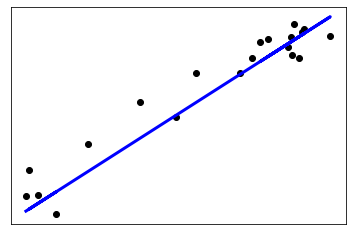

In [32]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(apple_y_test, apple_y_pred))
# The coefficient of determination: 1 is perfect prediction

#***r2 score is having issues with values***
# gets a score of -3.0 ??

#print('Coefficient of determination: %.2f'
      #% r2_score(apple_y_train, apple_y_pred))

# Plot outputs
plt.scatter(apple_X_test, apple_y_test,  color='black')
plt.plot(apple_X_test, apple_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Experiment 2

### Get Data Prepared

In [112]:
#High
appleHighFirst20 = appleStock['high']
appleHighFirst20 = appleHighFirst20[5:25] #I changed it a little bit to not have outliers that will affect graph

appleHighLast20 = appleStock['high']
appleHighLast20 = appleHighLast20[-20:]

#Low
appleLowFirst20 = appleStock['low']
appleLowFirst20 = appleLowFirst20[5:25]

appleLowLast20 = appleStock['low']
appleLowLast20 = appleLowLast20[-20:]

20


## Scatter Models

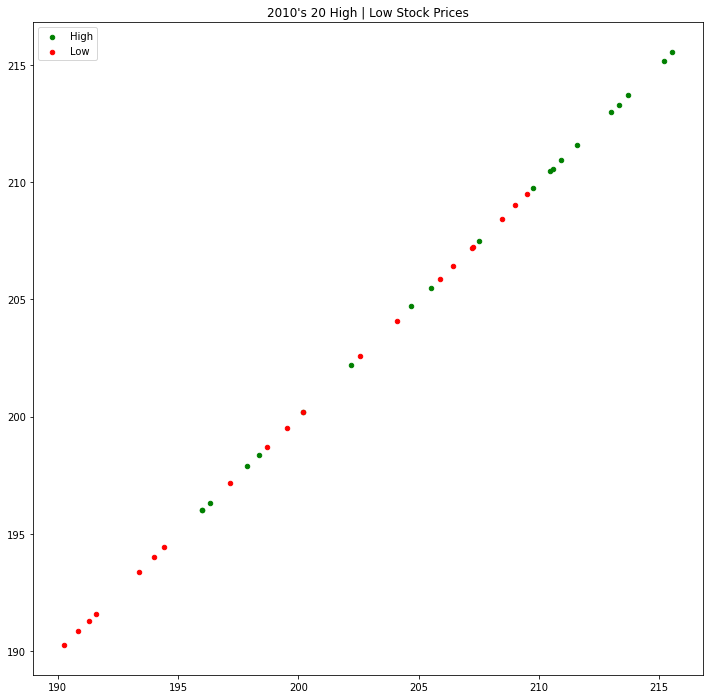

In [118]:
fig = plt.figure(figsize= (12, 12))
ax1 = fig.add_subplot(111)
ax1.scatter(x=appleHighFirst20, y=appleHighFirst20, c='green', s=20, label='High')
ax1.scatter(x=appleLowFirst20, y=appleLowFirst20, c='red', s=20, label='Low')
ax1.set_title("2010's 20 High | Low Stock Prices")
ax1.legend()
plt.show()

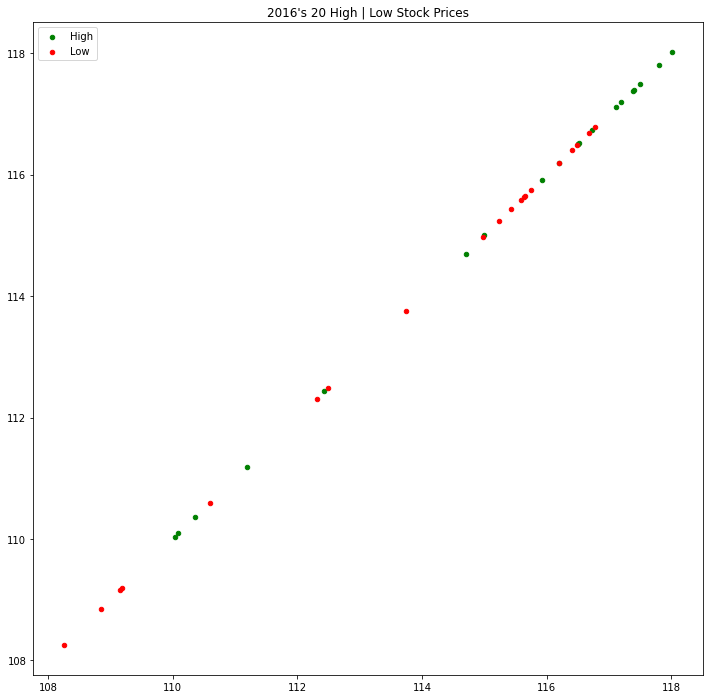

In [117]:
fig = plt.figure(figsize= (12, 12))
ax1 = fig.add_subplot(111)
ax1.scatter(x=appleHighLast20, y=appleHighLast20, c='green', s=20, label='High')
ax1.scatter(x=appleLowLast20, y=appleLowLast20, c='red', s=20, label='Low')
ax1.set_title("2016's 20 High | Low Stock Prices")
ax1.legend()
plt.show()

## Make and Train Data Sets

In [120]:
# Split the data into training/testing sets
appleHigh = appleStock['high']
appleHigh = appleHigh.to_frame()
print(type(appleHigh))
print(len(appleHigh))
appleHigh.describe
apple_X_train = appleHigh[:-20]
apple_X_test = appleHigh[-20:]

# Split the targets into training/testing sets
appleLow = appleStock['low']
appleLow = appleLow.to_frame()
print(type(appleLow))
print(len(appleLow))
appleLow.describe
apple_y_train = appleLow[:-20]
print(len(apple_y_train))
apple_y_test = appleLow[-20:]
print(len(apple_y_test))

<class 'pandas.core.frame.DataFrame'>
1762
<class 'pandas.core.frame.DataFrame'>
1762
1742
20


## Prediction

In [121]:
dfApple_y_pred = pd.DataFrame(apple_y_pred)
print(dfApple_y_pred.describe)

<bound method NDFrame.describe of              0
0   109.251699
1   110.080746
2   109.581321
3   109.341599
4   110.939757
5   112.388086
6   113.366961
7   113.916323
8   115.114947
9   115.454552
10  116.543302
11  115.874075
12  116.812988
13  116.872924
14  116.423437
15  115.664309
16  116.593240
17  117.592090
18  116.523321
19  116.723096>


## Linear Model

In [122]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(apple_X_train, apple_y_train)

LinearRegression()

In [123]:
# Make predictions using the testing set
apple_y_pred = regr.predict(apple_X_test)

In [124]:
## Data Print

Coefficients: 
 [[0.9810482]]
Mean squared error: 1.02


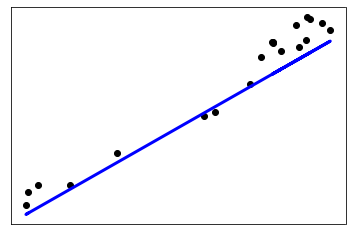

In [127]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(apple_y_test, apple_y_pred))
# The coefficient of determination: 1 is perfect prediction

#***r2 score is having issues with values***
# gets a score of -3.0 ??

#print('Coefficient of determination: %.2f'
      #% r2_score(apple_y_train, apple_y_pred))

# Plot outputs
plt.scatter(apple_X_test, apple_y_test,  color='black')
plt.plot(apple_X_test, apple_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Experiment 3

## Get Data Prepared

In [133]:
#Volume
appleVolume = appleStock['volume']
print(appleVolume)
#High
#We already have the appleHigh = appleStock['high'] from the previous experiment

254       123432400.0
721       150476200.0
1189      138040000.0
1657      119282800.0
2125      111902700.0
             ...     
848767     14249500.0
849267     18296900.0
849767     20905900.0
850267     15039500.0
850767     30586300.0
Name: volume, Length: 1762, dtype: float64


## Scatter

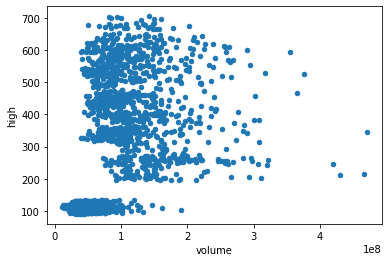

In [140]:
appleStock.plot.scatter(x='volume', y='high')
plt.show()